<a href="https://colab.research.google.com/github/NeetishPathak/biz_machine_learning/blob/main/Deep_Learning/Classifier/Movie_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Movie Classifier

This notebook is classifies the movie reviews as positive or negative.
It is a binary classifier

Dataset used is IMDB dataset that contains text of 50000 movie reviews from the internet movie database.
We will split the dataset into two sets. One for testing and the other one for validation.

The notebook uses tf.keras, a high-level API to build and train models in Tensorflow Hub, a library for transfer learning.

## Step 1 

#### We'll import the required modules and check on the some info regarding version and GPU availability

In [1]:
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds # Importing tensorflow dataset

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "not available")

Version:  2.8.2
Eager mode:  True
Hub version:  0.12.0
GPU is available


## Step 2

We will create two data subsets, one for training the other for validation 

TFDS
<br>
Title: `imdb_reviews`, A collection of ready-to-use datasets <br>
Link:  [https://www.tensorflow.org/datasets](https://www.tensorflow.org/datasets)

In [2]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train","test"], batch_size=-1, as_supervised=True)
train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteQX7VFP/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteQX7VFP/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteQX7VFP/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [3]:
print("Training entries: {}, test entries: {}".format(len(train_examples),len(test_examples)))

Training entries: 25000, test entries: 25000


## Examine the Training Data

We've split the dataset into two subsets. The label is an integer value of either 0 or 1. 0 implies a negative review and 1 implies a positive review

In [4]:
print("Review Samples from Training Data : \n",train_examples[:5])
print("Labels for the Samples from Trainig Data : ",train_labels[:5])

Review Samples from Training Data : 
 [b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
 b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the fi

## Visualizing the Data traing data

We'll visualize the distribution of reviews in training data using a pie chart


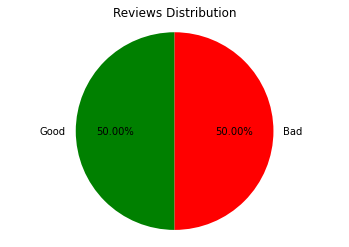

In [5]:
import matplotlib.pyplot as plt
labels = 'Good', 'Bad'
good = len([x for x in train_labels if x == 1])
bad = len([x for x in train_labels if x == 0])
sections = [good,bad]
colors=['g','r']

plt.pie(sections,labels=labels, colors=colors, startangle=90, explode=(0,0),autopct="%1.2f%%")

plt.axis('equal')
plt.title("Reviews Distribution")
plt.show()

## Building the model

The neural network is created by stacking layers. This requires three main architectural decisions

1. How to represent the text?
2. How many layers to use in the model?
3. How many hidden units to use for each layer?



In [6]:
# model = "https://tfhub.dev/google/nnlm-en-dim50/2"
# model="https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2"
model="https://tfhub.dev/google/nnlm-en-dim50-with-normalization/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[-6.63082255e-03, -3.77843566e-02, -1.06093893e-03,
         1.12500794e-01, -3.08166802e-01, -5.20975105e-02,
         1.18060581e-01, -3.02085876e-01, -3.61006558e-01,
         7.17748515e-03,  2.87228912e-01, -3.49928141e-02,
         8.54964852e-02,  2.43020013e-01, -1.87678829e-01,
        -8.90086591e-02, -3.96383733e-01, -2.78948843e-01,
         2.26424798e-01, -9.84284818e-01,  2.02210531e-01,
        -3.18006486e-01,  5.52558243e-01,  3.08822215e-01,
        -3.95315766e-01,  3.10828447e-01, -1.08329940e+00,
        -3.35959673e-01,  6.85921609e-01, -2.32374862e-01,
        -6.95451498e-01,  2.49214068e-01,  3.22257400e-01,
        -1.12029798e-01, -3.34058970e-01,  2.19253391e-01,
         2.99318135e-01,  6.99665546e-02,  2.17674166e-01,
        -4.59277511e-01,  1.25848921e-02,  1.51505351e-01,
        -3.85719329e-01,  1.05302185e-01, -3.84931058e-01,
        -6.05441988e-01, -2.25554466e-01, -2.51675338e-01,
       

Next, we'll build the full model

The neural network layers are stacked sequentially to build the model
1. The first layer is the tensorflow Hub Layer. This layer is the pre-trained saved model to map a sentence into its embedding vector. The model we are using is called [google/nnlm-en-dim50/2](https://tfhub.dev/google/nnlm-en-dim50/2) splits the sentence into tokens, embdes each token and then combines the embeddings. The resulting dimensions are [num_examples,embedding_dimensions]

2. The fixed length output vector is piped through a fully-connected dense layer with 16 hidden units

3. The last layer is densely connected with a single outpit node. This output logits: the log-odds of the truw class, according to the model

In [7]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))
# print(model)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


### A note on Hidden Units

The above model has two intermediate or "hidden" layers, between the input and the output. The number of outputs is the dimension of the representational space for the layer. In other words, the amount of freedom the network is allowed when learning an internal representation.

If a model has more hidden units and or more layers, the the network can learn more complex representations. However it makes the metrwork more computationally expensive and may lead to learning unwanted patterns - patterns that improve performance on training data but not on the test data.

This is called overfitting.

### A note on Loss function and optimizer

A model needs a loss fucntion and an optimizer for training. Since this is a binary classification problem and the model outputs a probability (a single-unit layer with a sigmoid activation), we'll use the binary_crossentropy loss function.

binary_crossentropy is a better loss fucntion when dealing with probabilities compared to mean squared errors.

Let's configure the model to use an optimizer and loss function.

In [8]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(from_logits=True),metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

## Validation Set

We will take 10000 samples from the training data to create the validation set

In [9]:
x_validation = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_validation = train_labels[:10000]
partial_y_train = train_labels[10000:]

## Train the model

- Train the model for 40 epochs in mini-batches of 512 samples.
- This will perform 40 iterations over all samples in the x_train and y_tarin tensors
- While training, monitor the model's loss and accuracy on the 10000 samples from the validation set

In [10]:
history = model.fit(partial_x_train, partial_y_train, epochs=40, batch_size=512, validation_data=(x_validation,y_validation),verbose=1)

Epoch 1/40
30/30 [==============================] - 6s 65ms/step - loss: 0.6739 - accuracy: 0.6143 - val_loss: 0.6017 - val_accuracy: 0.7305
Epoch 2/40
30/30 [==============================] - 2s 59ms/step - loss: 0.5388 - accuracy: 0.7924 - val_loss: 0.5013 - val_accuracy: 0.8012
Epoch 3/40
30/30 [==============================] - 2s 59ms/step - loss: 0.4184 - accuracy: 0.8589 - val_loss: 0.4051 - val_accuracy: 0.8461
Epoch 4/40
30/30 [==============================] - 2s 60ms/step - loss: 0.3096 - accuracy: 0.9011 - val_loss: 0.3355 - val_accuracy: 0.8719
Epoch 5/40
30/30 [==============================] - 2s 58ms/step - loss: 0.2275 - accuracy: 0.9292 - val_loss: 0.2968 - val_accuracy: 0.8834
Epoch 6/40
30/30 [==============================] - 2s 59ms/step - loss: 0.1705 - accuracy: 0.9506 - val_loss: 0.2761 - val_accuracy: 0.8883
Epoch 7/40
30/30 [==============================] - 2s 59ms/step - loss: 0.1289 - accuracy: 0.9651 - val_loss: 0.2669 - val_accuracy: 0.8902
Epoch 8/40
30

model.fit() returns a History object that contains a dictionary with everything that happend during the training

In [11]:
history_dict = history.history
print(history_dict.keys())
print(history_dict)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
{'loss': [0.6739007234573364, 0.5387884378433228, 0.4183569550514221, 0.30964112281799316, 0.22745069861412048, 0.1704699546098709, 0.1289249062538147, 0.0978928655385971, 0.07443855702877045, 0.056449923664331436, 0.043143704533576965, 0.03350453823804855, 0.02579386718571186, 0.020239554345607758, 0.016148820519447327, 0.013180520385503769, 0.010834794491529465, 0.008930414915084839, 0.0075113242492079735, 0.0062977010384202, 0.005357242655009031, 0.004444627556949854, 0.0038101293612271547, 0.003328382270410657, 0.002935343189164996, 0.002596574602648616, 0.002322368323802948, 0.0020917668007314205, 0.0018864868907257915, 0.0017147894250229, 0.0015613451832905412, 0.0014286624500527978, 0.0013100149808451533, 0.001211497001349926, 0.0011155251413583755, 0.001034527667798102, 0.0009584454237483442, 0.0008911440381780267, 0.000832567922770977, 0.0007776581915095448], 'accuracy': [0.6142666935920715, 0.7924000024795532, 0.8589

## Evaluating Model

Evaluate the model over test data. Two values will be returned. Loss and Accuracy

In [12]:
results= model.evaluate(test_examples, test_labels)
print(results)

782/782 [==============================] - 4s 5ms/step - loss: 0.5083 - accuracy: 0.8624
[0.5082595348358154, 0.8623600006103516]


A fairly naive approach is giving an accuracy of 87%. With more advanced approaches, model should get better. 

We can use different models from Tensorflow Hub for pre-trained text embeddings as the first layer. We have used  [google/nnlm-en-dim50/2](https://tfhub.dev/google/nnlm-en-dim50/2) 

We can also use two other models
- [google/nnlm-en-dim50-with-normalization/2](https://tfhub.dev/google/nnlm-en-dim50-with-normalization/2) - same as [google/nnlm-en-dim50/2](https://tfhub.dev/google/nnlm-en-dim50/2), but with additional text normalization to remove punctuation. This can help to get better coverage of in-vocabulary embeddings for tokens on your input text.
- [google/nnlm-en-dim128-with-normalization/2](https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2) - A larger model with an embedding dimension of 128 instead of the smaller 50.

## Visualizing Accuracy and Loss

model.fit() returns a History object that contains a dictionary with everything that happend during the training

`dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])`

We can plot the training and validation loss for comparison as well as the training and validation accuracy

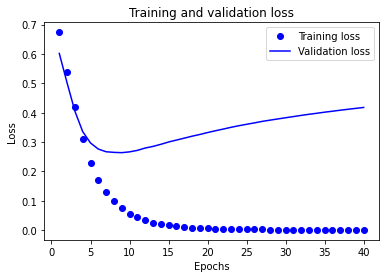

In [13]:
accuracy = history_dict['accuracy']
validation_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
validation_loss = history_dict['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs,validation_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

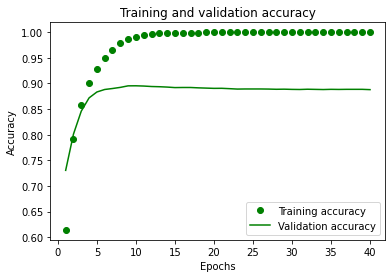

In [14]:
plt.clf()

plt.plot(epochs, accuracy, 'go', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Analysis

Loss and Accuracy: Training loss decreases with each epoch and the training accuracy increases with each epoch. This is expected when using a gradient descent optimizer. It should minimize the desired quantity on every iteration

This isnt true for the the validation loss and accuracy - they seem to peak after about 20 epochs. This is an example of overfitting. The model performs better on the training data than it does on the data it has never seen before. After this point, the model over-optimizes and learns representations specific to the training data taht do not generalize to test the data

For this case we can avoid overfitting by simply stopping the training after 20 epochs